In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\bever\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv(os.path.join("..", "data", "exoplanet_data.csv"))
#" Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
# selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_period', 'koi_period_err1', 
#                         'koi_period_err2', 'koi_time0bk','koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 
#                         'koi_impact_err1','koi_impact_err2', 'koi_duration', 'koi_duration_err1','koi_duration_err2', 
#                         'koi_depth', 'koi_depth_err1', 'koi_depth_err2','koi_prad', 'koi_prad_err1', 'koi_prad_err2']]
selected_features = df.drop("koi_disposition", axis=1)
selected_features_names = selected_features.columns
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
selected_features_names

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
target = df["koi_disposition"]
target_names = ["CANIDATE", "CONFIRMED","FALSE POSITIVE"]
data = selected_features
data_names = selected_features_names

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [10]:
X_test.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4982,1,0,0,0,88.523517,2.337000e-03,-2.337000e-03,189.275600,0.023200,-0.023200,...,-75,4.782,0.060,-0.070,0.462,0.050,-0.070,295.57629,48.897861,15.841
4866,0,0,0,0,102.493119,1.322000e-03,-1.322000e-03,166.009400,0.010500,-0.010500,...,-140,4.583,0.024,-0.117,0.791,0.132,-0.055,297.66437,46.944820,15.142
2934,0,0,1,0,1.181165,3.890000e-06,-3.890000e-06,132.425220,0.002760,-0.002760,...,-154,4.582,0.048,-0.078,0.747,0.098,-0.066,291.34879,51.256119,15.971
5007,0,1,0,0,8.412009,2.360000e-07,-2.360000e-07,139.648520,0.000024,-0.000024,...,-206,4.225,0.185,-0.185,1.314,0.373,-0.305,291.84970,37.738621,13.551
3869,0,1,1,1,1.195515,5.730000e-07,-5.730000e-07,132.303851,0.000410,-0.000410,...,-182,4.271,0.220,-0.180,1.155,0.331,-0.271,297.54337,41.947979,13.998


In [11]:
y_train.head()

6122         CANDIDATE
6370    FALSE POSITIVE
2879    FALSE POSITIVE
107          CONFIRMED
29           CANDIDATE
Name: koi_disposition, dtype: object

In [12]:
y_test.head()

4982    FALSE POSITIVE
4866         CANDIDATE
2934    FALSE POSITIVE
5007    FALSE POSITIVE
3869    FALSE POSITIVE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [13]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [14]:
# Support vector machine linear classifier
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [15]:
# Output the training and test scores
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8455082967766546
Testing Data Score: 0.8415331807780321


In [16]:
# Calculate classification report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

      CANIDATE       0.70      0.62      0.66       411
     CONFIRMED       0.71      0.76      0.73       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.84      0.84      0.84      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [17]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],
              'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(model, param_grid, verbose=3)

In [18]:
# Train the model with GridSearch
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.858, total=   0.6s
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.833, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.855, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.832, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.835, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.505, total=   2.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.506, total=   2.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.505, total=   2.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.506, total=   2.9s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.875, total=   0.5s
[CV] C=5, gamma=0.0001, kernel=linear ................................
[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.851, total=   0.5s
[CV] C=5, gamma=0.0001, kernel=linear ................................
[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.872, total=   0.6s
[CV] C=5, gamma=0.0001, kernel=linear ................................
[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.850, total=   0.5s
[CV] C=5, gamma=0.0001, kernel=linear ................................
[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.861, total=   0.6s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=5, gamma=0.0001, kernel=rbf, score=0.505, total=   2.1s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=5, gamma=0.0001, kernel=rbf, score=0.506, total=   2.1s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV] .

[CV] ....... C=5, gamma=0.005, kernel=poly, score=0.506, total=   1.8s
[CV] C=5, gamma=0.005, kernel=poly ...................................
[CV] ....... C=5, gamma=0.005, kernel=poly, score=0.506, total=   1.7s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.891, total=   0.6s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.863, total=   0.5s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.882, total=   0.6s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.853, total=   0.5s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.868, total=   0.6s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] ...... C=10, gamma=0.005, kernel=poly, score=0.506, total=   2.0s
[CV] C=10, gamma=0.005, kernel=poly ..................................
[CV] ...... C=10, gamma=0.005, kernel=poly, score=0.505, total=   1.9s
[CV] C=10, gamma=0.005, kernel=poly ..................................
[CV] ...... C=10, gamma=0.005, kernel=poly, score=0.506, total=   2.1s
[CV] C=10, gamma=0.005, kernel=poly ..................................
[CV] ...... C=10, gamma=0.005, kernel=poly, score=0.506, total=   2.1s
[CV] C=50, gamma=0.0001, kernel=linear ...............................
[CV] ... C=50, gamma=0.0001, kernel=linear, score=0.896, total=   0.8s
[CV] C=50, gamma=0.0001, kernel=linear ...............................
[CV] ... C=50, gamma=0.0001, kernel=linear, score=0.879, total=   0.8s
[CV] C=50, gamma=0.0001, kernel=linear ...............................
[CV] ... C=50, gamma=0.0001, kernel=linear, score=0.891, total=   0.9s
[CV] C=50, gamma=0.0001, kernel=linear ...............................
[CV] .

[CV] ....... C=50, gamma=0.005, kernel=rbf, score=0.825, total=   1.0s
[CV] C=50, gamma=0.005, kernel=poly ..................................
[CV] ...... C=50, gamma=0.005, kernel=poly, score=0.555, total=   2.0s
[CV] C=50, gamma=0.005, kernel=poly ..................................
[CV] ...... C=50, gamma=0.005, kernel=poly, score=0.556, total=   1.9s
[CV] C=50, gamma=0.005, kernel=poly ..................................
[CV] ...... C=50, gamma=0.005, kernel=poly, score=0.544, total=   2.2s
[CV] C=50, gamma=0.005, kernel=poly ..................................
[CV] ...... C=50, gamma=0.005, kernel=poly, score=0.549, total=   2.8s
[CV] C=50, gamma=0.005, kernel=poly ..................................
[CV] ...... C=50, gamma=0.005, kernel=poly, score=0.567, total=   2.3s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  5.8min finished


In [19]:
# Output the grid search best params and best score
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}
0.8823155822702828


In [20]:
# Output the grid training and test scores
print(f"Training Data Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test)}")

Training Data Score: 0.8865153538050734
Testing Data Score: 0.8792906178489702


In [21]:
# Found in article https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998
# Fit the best found from the grid search
best_params = grid_result.best_params_
best_svc = SVC(kernel=best_params["kernel"], C=best_params["C"], gamma=best_params["gamma"])
best_svc.fit(X_train_scaled, y_train)

SVC(C=50, gamma=0.0001, kernel='linear')

In [22]:
# Output the training and test scores for the best params model
print(f"Best SVM Training Data Score: {best_svc.score(X_train_scaled, y_train)}")
print(f"Best SVM Testing Data Score: {best_svc.score(X_test_scaled, y_test)}")

Best SVM Training Data Score: 0.8865153538050734
Best SVM Testing Data Score: 0.8792906178489702


In [23]:
# Make predictions and calculate classification report
predictions = best_svc.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

      CANIDATE       0.81      0.67      0.73       411
     CONFIRMED       0.76      0.85      0.80       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.88      0.88      0.88      1748



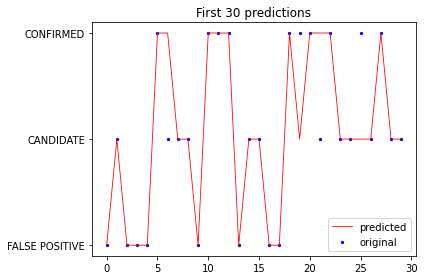

In [24]:
# Create a preduction vs original chart
x_ax = range(len(y_test[:30]))
plt.scatter(x_ax, y_test[:30], s=5, color="blue", label="original")
plt.plot(x_ax, predictions[:30], lw=0.8, color="red", label="predicted")
plt.title('First 30 predictions')
plt.legend()
# Save the plot
plt.tight_layout()
plt.savefig(os.path.join("..", "Images", "SVM_plot.png"))
# Show the figure
plt.show()

# Save the Model

In [25]:
# Save the model
filename = os.path.join("..", "models", "model_SVM.sav")
joblib.dump(best_svc, filename)

['..\\models\\model_SVM.sav']

# Save the Grid

In [26]:
# Save the grid
filename = os.path.join("..", "models", "grid_SVM.sav")
joblib.dump(grid, filename)

['..\\models\\grid_SVM.sav']